   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


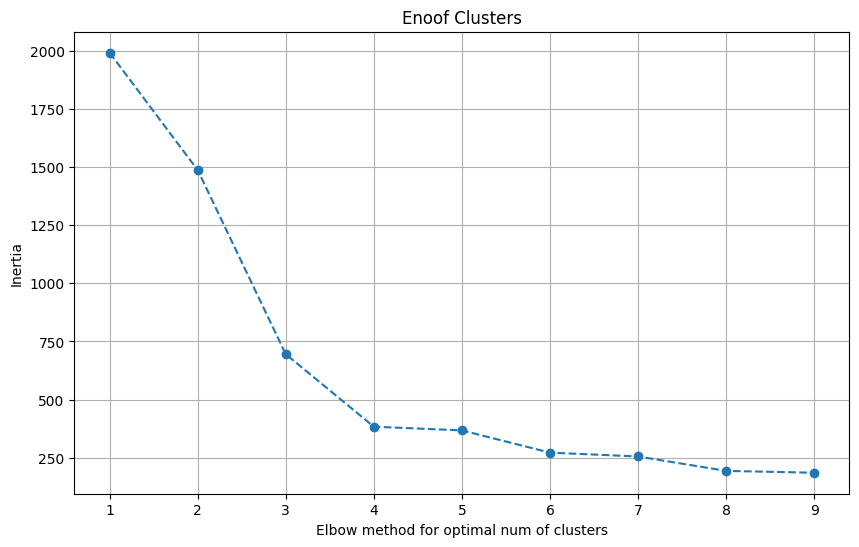

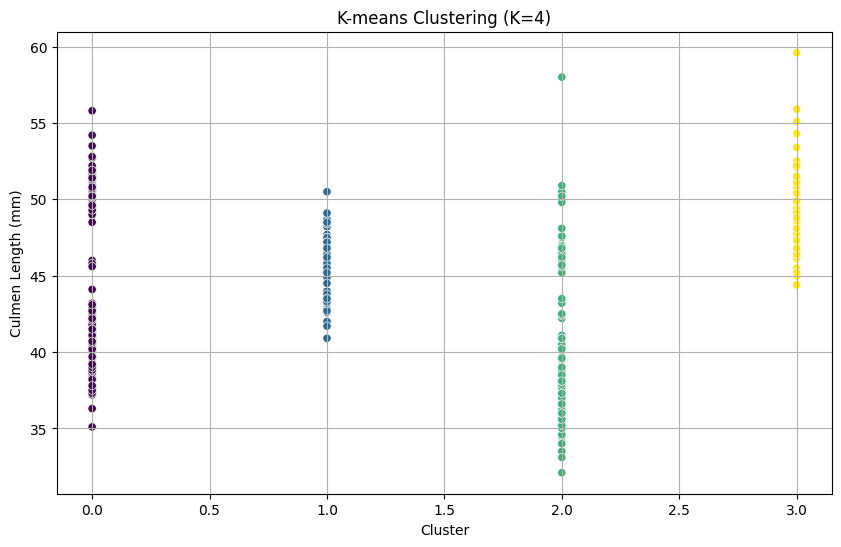

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             45.563793        14.237931         212.706897
2             40.217757        17.611215         189.046729
3             49.473770        15.718033         221.540984


In [4]:
# saw the datacamp solution
# although, i am not familier yet with some syntax used here in the program
# but at least i got to learn this elbow method
# will work on it more sooner
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())
print(penguins_df.info())

penguins_df = pd.get_dummies(penguins_df, dtype='int')

scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X, columns=penguins_df.columns)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Elbow method for optimal num of clusters')
plt.ylabel('Inertia')
plt.title('Enoof Clusters')
plt.grid(True)
plt.show()

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_df, x='label', y='culmen_length_mm', hue='label', palette='viridis', legend=None)
plt.xlabel('Cluster')
plt.ylabel('Culmen Length (mm)')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.grid(True)
plt.show()

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
print(stat_penguins)